ACCY 405
William Xu, Danny Zhang, Ivy Wang, Yuning Wang

Download Data from Cencus
AGE,SEX,INCOME from Philadelphia city, state pensayviana

In [ ]:
import pandas as pd
import requests

print("Retrieving Philadelphia Household Income (HINCP) Data")
print("----------------------------------------------------")

# Step 1: First identify the PUMA codes for Philadelphia
print("Step 1: Identifying Philadelphia PUMA codes...")
url_pumas = "https://api.census.gov/data/2022/acs/acs1?get=NAME&for=public%20use%20microdata%20area:*&in=state:42"

response_pumas = requests.get(url_pumas)
if response_pumas.status_code == 200:
    pumas_data = response_pumas.json()
    pumas_df = pd.DataFrame(pumas_data[1:], columns=pumas_data[0])
    
    # Filter for Philadelphia PUMAs
    philly_pumas = pumas_df[pumas_df['NAME'].str.contains('Philadelphia', case=False)]
    
    print(f"Found {len(philly_pumas)} Philadelphia PUMAs")
    
    # Extract the PUMA codes for Philadelphia
    philly_puma_codes = philly_pumas['public use microdata area'].tolist()
    print(f"Philadelphia PUMA codes: {', '.join(philly_puma_codes)}")
    
    # Step 2: Get Pennsylvania data INCLUDING HINCP and filter for Philadelphia
    print("\nStep 2: Retrieving HINCP data for Philadelphia...")
    
    # Include HINCP in the variables we're requesting
    # Note: we're using the 2022 acs/acs1/pums dataset which has HINCP available
    url_pa = "https://api.census.gov/data/2022/acs/acs1/pums?get=AGEP,SEX,PINCP,PUMA&for=state:42"
    
    print(f"Requesting URL: {url_pa}")
    response_pa = requests.get(url_pa)
    print(f"Response status code: {response_pa.status_code}")
    
    if response_pa.status_code == 200:
        pa_data = response_pa.json()
        pa_df = pd.DataFrame(pa_data[1:], columns=pa_data[0])
        
        # Filter for Philadelphia PUMAs only
        philly_df = pa_df[pa_df['PUMA'].isin(philly_puma_codes)]
        
        print(f"\nSuccessfully retrieved {len(philly_df)} records for Philadelphia")
        
        # Store the Philadelphia data in a variable named df
        df = philly_df.copy()
        
        # Convert HINCP to numeric
        df['PINCP'] = pd.to_numeric(df['PINCP'], errors='coerce')
        
        print(f"\nData stored in df: {df.shape} rows x {df.shape[1]} columns")
        print("\nFirst 5 rows:")
        print(df.head())
        
        
        print("\nHousehold Income (PINCP) Statistics:")
        print(f"Median: ${df['PINCP'].median():,.2f}")
        print(f"Mean: ${df['PINCP'].mean():,.2f}")
        print(f"Maximum: ${df['PINCP'].max():,.2f}")
        print(f"Minimum: ${df['PINCP'].min():,.2f}")
        print(f"Standard Deviation: ${df['PINCP'].std():,.2f}")
        print(f"Variance: ${df['PINCP'].var():,.2f}")
        
        # Save the dataframe to CSV (optional)
        df.to_csv("philadelphia_final.csv", index=False)
        print("\nData saved to philadelphia_hincp.csv")
        
    else:
        print(f"Error retrieving Pennsylvania data: {response_pa.text}")
else:
    print(f"Error retrieving PUMA codes: {response_pumas.text}")
    
print("\nNOTE: If you're running this in a Jupyter notebook, the dataframe is stored in the 'df' variable")
print("You can access it directly by typing 'df' in another cell") 

Retrieving Philadelphia Household Income (HINCP) Data
----------------------------------------------------
Step 1: Identifying Philadelphia PUMA codes...
Found 11 Philadelphia PUMAs
Philadelphia PUMA codes: 03216, 03221, 03222, 03223, 03224, 03225, 03227, 03228, 03229, 03230, 03231

Step 2: Retrieving HINCP data for Philadelphia...
Requesting URL: https://api.census.gov/data/2022/acs/acs1/pums?get=AGEP,SEX,PINCP,PUMA&for=state:42
Response status code: 200

Successfully retrieved 8129 records for Philadelphia

Data stored in df: (8129, 5) rows x 5 columns

First 5 rows:
   AGEP SEX  PINCP   PUMA state
26   30   1   4300  03231    42
27   33   1      0  03230    42
32   33   1  10100  03227    42
33   78   1   1300  03227    42
38   33   1      0  03225    42

Household Income (PINCP) Statistics:
Median: $20,000.00
Mean: $38,253.67
Maximum: $848,000.00
Minimum: $-19,999.00
Standard Deviation: $69,249.67
Variance: $4,795,517,152.70

Data saved to philadelphia_hincp.csv

NOTE: If you're ru

In [199]:
df.head()
#df=df[df["PINCP"]!=60000]
df.head()



,AGEP,SEX,PINCP,PUMA,state
26,30,1,4300,03231,42
27,33,1,0,03230,42
32,33,1,10100,03227,42
33,78,1,1300,03227,42
38,33,1,0,03225,42


In [200]:
with pd.option_context('float_format', '{:.0f}'.format):
    print(df["PINCP"].describe())

count     8129
mean     38254
std      69250
min     -19999
25%        850
50%      20000
75%      55000
max     848000
Name: PINCP, dtype: float64


In [201]:
clientdata=pd.read_excel("Database Philadelphia-3.xlsx")
clientdata.head()
clientdata=clientdata[clientdata["Age"]<=70]
clientdata=clientdata[clientdata["Age"]>=20]
clientdata.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Member,Gender,Age,Height,Weight,Ethnic,Religious,Active,Marital,Number of Pets,...,Travel,Name:,Unnamed: 31,Street Address,City,State,Zip,Phone:,Phone:.1,Secure Inc.
0,100357,F,29,69,165,NaN,P,N,N,2,...,N,Hale,Pauline,21107 S 2Nd 24,Aston,PA,19014,(303)4708079,(303)0120443,NaN
1,100365,M,29,72,212,NaN,O,Y,N,0,...,N,Sheridan,Merle,5100 S Goodwin,Furlong,PA,18925,(303)3838095,(303)2902573,NaN
2,100377,F,25,69,183,NaN,O,Y,N,4,...,N,Latorraca,Kathleen,2800 S Mattis C5,Philadelphia,PA,19102,(303)4921355,(303)1722876,NaN
3,100411,M,57,69,182,AA,O,Y,S,0,...,N,Seghi,Robert,501 N Richman,Morton,PA,19070,(303)2773272,(303)8595725,NaN
4,100420,M,46,68,185,NaN,C,N,W,0,...,N,Vevera,Jay,2449 Bevier,Morton,PA,19070,(303)2524185,(303)7824911,NaN


In [202]:
clean_clientdata=clientdata[["Gender","Age","Income"]]
clean_clientdata.head()


,Gender,Age,Income
0,F,29,38000.0
1,M,29,52175.0
2,F,25,43800.0
3,M,57,43800.0
4,M,46,23500.0


In [203]:
with pd.option_context('float_format', '{:.0f}'.format):
    print(clean_clientdata["Income"].describe())


count      1001
mean      59486
std      136389
min     -204800
25%       30950
50%       43200
75%       60600
max     3725148
Name: Income, dtype: float64


/var/folders/kk/fqsqqccn52dftn_l1fb2fpc40000gn/T/ipykernel_4823/702804804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_clientdata['Age_Group'] = pd.cut(clean_clientdata['Age'],
/var/folders/kk/fqsqqccn52dftn_l1fb2fpc40000gn/T/ipykernel_4823/702804804.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income = clean_clientdata.groupby('Age_Group')['Income'].mean()


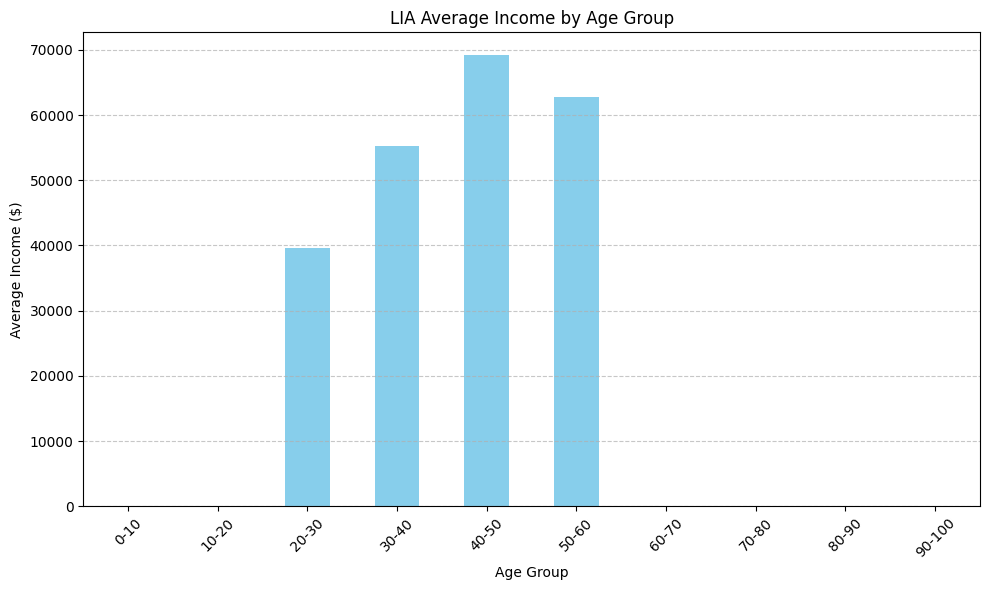

In [204]:
# Create age bins for 10-year intervals
clean_clientdata['Age_Group'] = pd.cut(clean_clientdata['Age'], 
                                      bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                                      labels=['0-10', '10-20', '20-30', '30-40', '40-50', 
                                             '50-60', '60-70', '70-80', '80-90', '90-100'])

# Calculate mean income by age group
# Calculate mean income by age group
age_income = clean_clientdata.groupby('Age_Group')['Income'].mean()

# Create a bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
age_income.plot(kind='bar', color='skyblue')
plt.title('LIA Average Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Income ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [205]:
df["AGEP"]=df["AGEP"].astype(int)

/var/folders/kk/fqsqqccn52dftn_l1fb2fpc40000gn/T/ipykernel_4823/734262794.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_Group")["PINCP"].mean()
/var/folders/kk/fqsqqccn52dftn_l1fb2fpc40000gn/T/ipykernel_4823/734262794.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income = df.groupby('Age_Group')['PINCP'].mean()


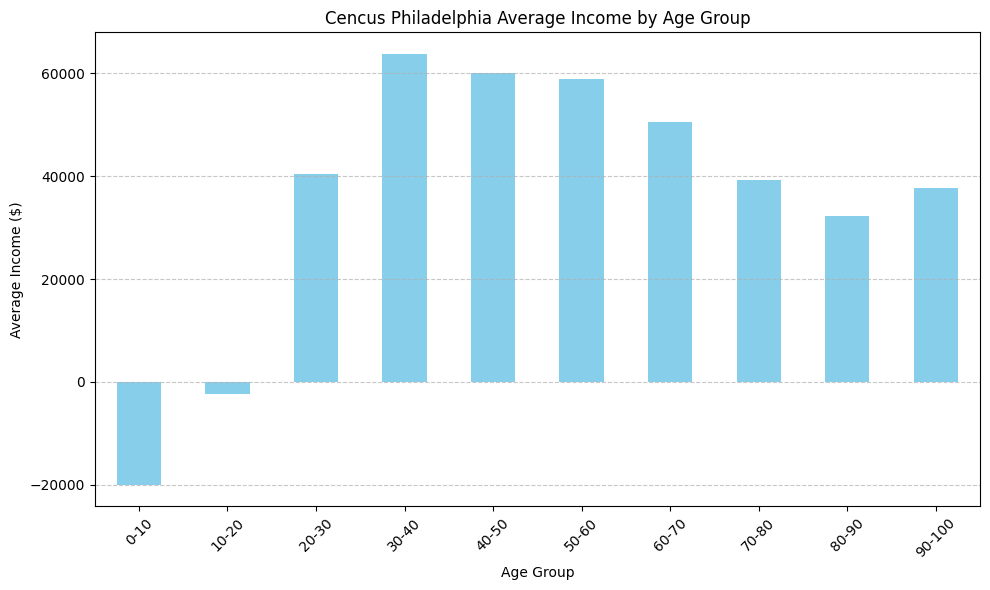

In [206]:
df["Age_Group"]=pd.cut(df["AGEP"], 
                                      bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                                      labels=['0-10', '10-20', '20-30', '30-40', '40-50', 
                                             '50-60', '60-70', '70-80', '80-90', '90-100'])

df.groupby("Age_Group")["PINCP"].mean()
age_income = df.groupby('Age_Group')['PINCP'].mean()

# Create a bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
age_income.plot(kind='bar', color='skyblue')
plt.title('Cencus Philadelphia Average Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Income ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [207]:
df = df.rename(columns={'PINCP': 'Income','AGEP':'Age','SEX':'Gender'})
df.drop(columns=["PUMA",'state','state'],inplace=True)

# Replace rows with 0 income with their age group average income
# First, calculate the average income by age group
age_group_avg = df.groupby('Age_Group')['Income'].mean()

# Create a mask for rows with 0 income
zero_income_mask = df['Income'] == 0

# For each row with 0 income, replace with the average for that age group
for idx in df[zero_income_mask].index:
    age_group = df.loc[idx, 'Age_Group']
    df.loc[idx, 'Income'] = age_group_avg[age_group]

df.head()

/var/folders/kk/fqsqqccn52dftn_l1fb2fpc40000gn/T/ipykernel_4823/762701757.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg = df.groupby('Age_Group')['Income'].mean()
/var/folders/kk/fqsqqccn52dftn_l1fb2fpc40000gn/T/ipykernel_4823/762701757.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '63780.43096568236' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[idx, 'Income'] = age_group_avg[age_group]


,Age,Gender,Income,Age_Group
26,30,1,4300.000000,20-30
27,33,1,63780.430966,30-40
32,33,1,10100.000000,30-40
33,78,1,1300.000000,70-80
38,33,1,63780.430966,30-40


In [208]:
clean_clientdata['Gender']=clean_clientdata['Gender'].replace({'M':1,'F':2})
clean_clientdata.head()


/var/folders/kk/fqsqqccn52dftn_l1fb2fpc40000gn/T/ipykernel_4823/3541311556.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_clientdata['Gender']=clean_clientdata['Gender'].replace({'M':1,'F':2})
/var/folders/kk/fqsqqccn52dftn_l1fb2fpc40000gn/T/ipykernel_4823/3541311556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_clientdata['Gender']=clean_clientdata['Gender'].replace({'M':1,'F':2})


,Gender,Age,Income,Age_Group
0,2,29,38000.0,20-30
1,1,29,52175.0,20-30
2,2,25,43800.0,20-30
3,1,57,43800.0,50-60
4,1,46,23500.0,40-50


In [209]:
df=df[df["Age"]>=20]
df=df[df["Age"]<=70]
df.head()
df.count()

Age          5548
Gender       5548
Income       5548
Age_Group    5548
dtype: int64

In [210]:
train=df
test=clean_clientdata
x_train=train[["Age","Gender"]]
y_train=train["Income"]
x_test=test[["Age","Gender"]]
y_test=test["Income"]
x_train.astype(int)
x_test.astype(int)
y_train.astype(int)
y_test.astype(int)
x_train["Gender"].astype(int)
x_test["Gender"].astype(int)
y_train.astype(int)
y_test.astype(int)
# Convert Gender column from object to int
x_train["Gender"] = x_train["Gender"].astype(int)
x_train.dtypes



/var/folders/kk/fqsqqccn52dftn_l1fb2fpc40000gn/T/ipykernel_4823/1672658285.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["Gender"] = x_train["Gender"].astype(int)


Age       int64
Gender    int64
dtype: object

In [214]:
x_train.head()
y_train.head()
x_test.head()
y_test.head()
y_train.describe()



count      5548.000000
mean      57750.910281
std       71478.565069
min       -7200.000000
25%       18000.000000
50%       41000.000000
75%       69000.000000
max      848000.000000
Name: Income, dtype: float64

In [212]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")




R² Score: -0.0106
MSE: 18779623582.9326
RMSE: 137038.7667
MAE: 37759.0147


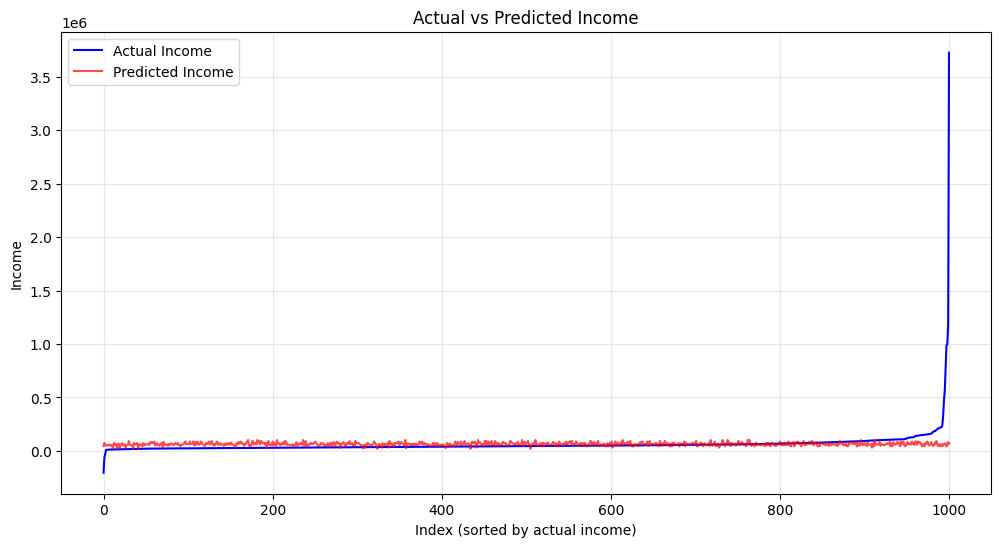

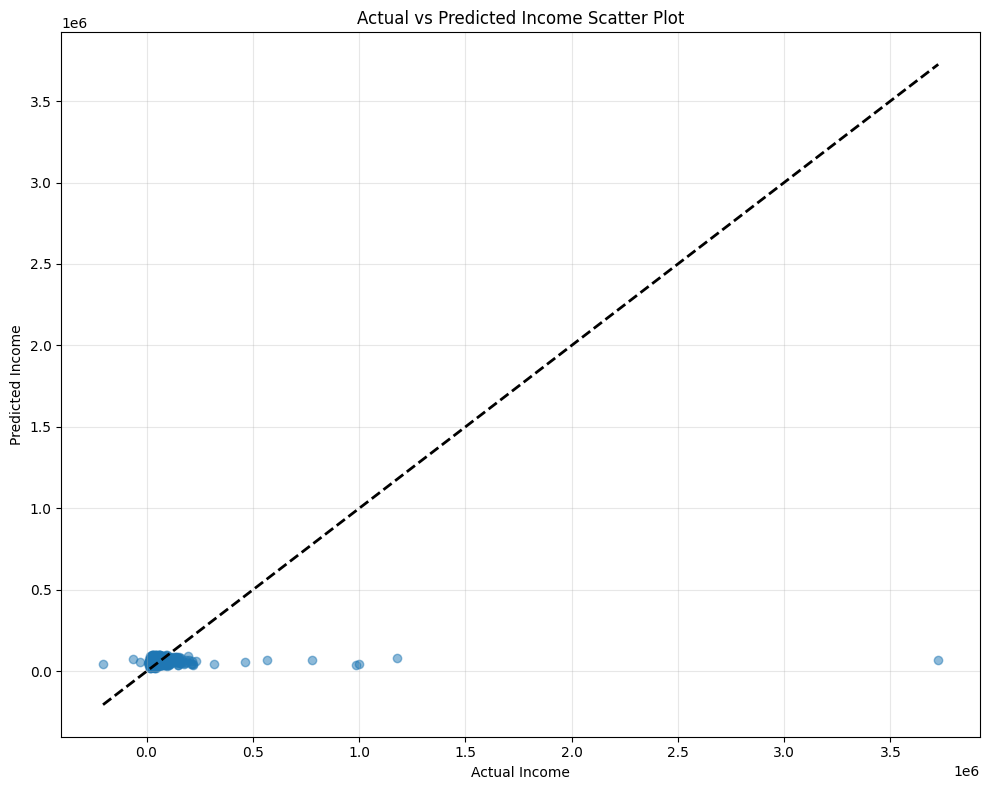

In [215]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for visualization
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Sort by actual values for better visualization
results_df = results_df.sort_values('Actual')

# Reset index for plotting
results_df = results_df.reset_index(drop=True)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual Income', color='blue')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted Income', color='red', alpha=0.7)
plt.title('Actual vs Predicted Income')
plt.xlabel('Index (sorted by actual income)')
plt.ylabel('Income')
plt.legend()
plt.grid(True, alpha=0.3)

# Add a scatter plot to show the relationship
plt.figure(figsize=(10, 8))
plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.5)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], 
         [results_df['Actual'].min(), results_df['Actual'].max()], 
         'k--', lw=2)
plt.title('Actual vs Predicted Income Scatter Plot')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


array([51243.88630447, 56599.27343962, 48690.41689023, ...,
       93326.45703964, 29958.44736595, 59708.87955615])

In [217]:
test["predicted"]=y_pred
test

/var/folders/kk/fqsqqccn52dftn_l1fb2fpc40000gn/T/ipykernel_4823/1760484834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted"]=y_pred


,Gender,Age,Income,Age_Group,predicted
0,2,29,38000.0,20-30,51243.886304
1,1,29,52175.0,20-30,56599.273440
2,2,25,43800.0,20-30,48690.416890
3,1,57,43800.0,50-60,101307.612849
4,1,46,23500.0,40-50,57664.412528


In [219]:
# Calculate the risk based on the difference between actual income and predicted income
# Risk is defined as the percentage difference between actual and predicted values
test['differecne_percentage'] = abs(((test['Income'] - test['predicted']) / test['predicted']) * 100)

# Display the first few rows with the new risk column
print("Risk represents the percentage difference between actual and predicted income:")
print("Positive values: Actual income is higher than predicted")
print("Negative values: Actual income is lower than predicted")
test.head()


Risk represents the percentage difference between actual and predicted income:
Positive values: Actual income is higher than predicted
Negative values: Actual income is lower than predicted


/var/folders/kk/fqsqqccn52dftn_l1fb2fpc40000gn/T/ipykernel_4823/2514360848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['differecne_percentage'] = abs(((test['Income'] - test['predicted']) / test['predicted']) * 100)


,Gender,Age,Income,Age_Group,predicted,risk,differecne_percentage
0,2,29,38000.0,20-30,51243.886304,-25.844812,25.844812
1,1,29,52175.0,20-30,56599.273440,-7.816838,7.816838
2,2,25,43800.0,20-30,48690.416890,-10.043900,10.043900
3,1,57,43800.0,50-60,101307.612849,-56.765342,56.765342
4,1,46,23500.0,40-50,57664.412528,-59.246962,59.246962


In [220]:
test.differecne_percentage.describe()

count    1001.000000
mean       60.373728
std       205.342145
min         0.049842
25%        23.089886
50%        42.567197
75%        59.903294
max      5318.164048
Name: differecne_percentage, dtype: float64

In [223]:
# Create a new 'audit' column based on the difference percentage
# If the difference percentage is greater than 60, mark as 'Yes' for audit, otherwise 'No'
test['audit'] = test['differecne_percentage'].apply(lambda x: 'Yes' if x > 60 else 'No')

# Display the first few rows with the new audit column
print("\nAudit column added based on difference percentage > 60%:")
test.head()

test.audit.value_counts()




Audit column added based on difference percentage > 60%:


/var/folders/kk/fqsqqccn52dftn_l1fb2fpc40000gn/T/ipykernel_4823/739996348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['audit'] = test['differecne_percentage'].apply(lambda x: 'Yes' if x > 60 else 'No')


audit
No     751
Yes    250
Name: count, dtype: int64

In [224]:
test

,Gender,Age,Income,Age_Group,predicted,risk,differecne_percentage,audit
0,2,29,38000.0,20-30,51243.886304,-25.844812,25.844812,No
1,1,29,52175.0,20-30,56599.273440,-7.816838,7.816838,No
2,2,25,43800.0,20-30,48690.416890,-10.043900,10.043900,No
3,1,57,43800.0,50-60,101307.612849,-56.765342,56.765342,No
4,1,46,23500.0,40-50,57664.412528,-59.246962,59.246962,No
...,...,...,...,...,...,...,...,...
999,1,35,25400.0,30-40,87514.859253,-70.976357,70.976357,Yes
1000,2,45,67075.0,40-50,68752.957037,-2.440560,2.440560,No
1001,1,58,72700.0,50-60,93326.457040,-22.101404,22.101404,No
1003,2,24,15000.0,20-30,29958.447366,-49.930650,49.930650,No
